# Final Project 2: Exploratory Data Analysis on University Rankings

This case study consists of 3 parts: 


A. Data understanding and exploration
- Student to decide how to explore, inspect and cleanse the data 

B. Questions: 6 in total
- Answer the questions and derive the requested outputs with necessary explanations and inferences 

C. Open-ended Question 
- Student to decide the scope and methods/packages to use to answer the question and derive insights

The data reflects four years of ranking, 2012, 2013, 2014, 2015; 2012 and 2013 consists of the top 100 universities while 2014, and 2015 are the top 1000 universities. The data could be assessed on a yearly basis to uncover trends. 

The data was collected by The Center for World University Rankings. Sampling was weighted based on the following criteria: research output, (10%), high-quality publication, (10%), influence, (10%), citations, (10%), quality of faculty, (10%), alumni employment, (25%), quality of education, (25%). The totals of the above criteria is then used te create an aggregation and scoring. 

Data dictionary:
- World_rank - World rank for the university.
- Institution - Name of the university.
- Country - Country of each university.
- National_Rank - Rank of university within its country.
- Quality_of_education - Rank for quality of education; measured by the number of a university's alumni who have garnered major international accolades, i.e. Pulitzer, Nobel Prize.
- Alumni_employment - Rank for alumni employment; measured by the number of a university's alumni who have held CEO positions at multinational companies in relation to the university's size.
- Quality_of_faculty - Rank for quality of faculty; measured by the number of faculty who have won major international awards.
- Publications - Rank for publications.
- Influence - Rank for influence.
- Citations - Rank for citations.
- Broad_impact - Rank for broad impact (only available for 2014 and 2015).
- Patents - Rank for patents.
- Score - Total score, used for determining world rank.
- Year - Years of ranking (2012 to 2015).

# A. Data Understanding and exploration

### Read the cwur.Data.csv file and inspect the data, understand the data (what are the components, how it looks like, and some basic statistics about the variables). Take necessary steps to address any problems or issues with the data and fix them with appropriate measures.

In [1]:
### To install seaborn for usage of charts 
!pip install seaborn

In [2]:
### To import the below for this project 

import pandas as pd
import numpy as np
import operator
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
### To read the cwurData file 

df = pd.read_csv("cwurData.csv")
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [4]:
### Fetching the components of the cwurData.csv File
print(df.columns.values) 

['world_rank' 'institution' 'country' 'national_rank'
 'quality_of_education' 'alumni_employment' 'quality_of_faculty'
 'publications' 'influence' 'citations' 'broad_impact' 'patents' 'score'
 'year']


In [5]:
### Analyzing any Null Values in cwurData.csv File
print(df.isnull().sum()) 

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64


In [6]:
### Filling in the Null Values with the mean of the "broad_impact" 

df['broad_impact'] = df['broad_impact'].fillna(df['broad_impact'].mean())
print(df.isnull().sum())

world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
broad_impact            0
patents                 0
score                   0
year                    0
dtype: int64


In [7]:
### Getting summary of the cwurData.csv File
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2200 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB
None


In [8]:
### To compute the correlation of the columns 
df.corr()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
world_rank,1.000000,0.238553,0.676166,0.668529,0.663864,0.923037,0.895871,0.856573,0.853083,0.698214,-0.549098,0.320844
national_rank,0.238553,1.000000,0.211975,0.135342,0.222833,0.326857,0.161086,0.186797,0.170417,0.159440,-0.199756,0.102951
quality_of_education,0.676166,0.211975,1.000000,0.606421,0.786181,0.624657,0.645641,0.630455,0.435879,0.528120,-0.600541,0.427732
alumni_employment,0.668529,0.135342,0.606421,1.000000,0.558618,0.572096,0.527382,0.559200,0.371666,0.528219,-0.510374,0.427710
quality_of_faculty,0.663864,0.222833,0.786181,0.558618,1.000000,0.634423,0.656406,0.652186,0.428516,0.555107,-0.693540,0.484788
publications,0.923037,0.326857,0.624657,0.572096,0.634423,1.000000,0.874952,0.829912,0.831680,0.671558,-0.522111,0.318245
influence,0.895871,0.161086,0.645641,0.527382,0.656406,0.874952,1.000000,0.845207,0.830123,0.611811,-0.522837,0.318298
citations,0.856573,0.186797,0.630455,0.559200,0.652186,0.829912,0.845207,1.000000,0.769196,0.598728,-0.522438,0.328771
broad_impact,0.853083,0.170417,0.435879,0.371666,0.428516,0.831680,0.830123,0.769196,1.000000,0.508507,-0.430408,-0.000077
patents,0.698214,0.159440,0.528120,0.528219,0.555107,0.671558,0.611811,0.598728,0.508507,1.000000,-0.474810,0.368570


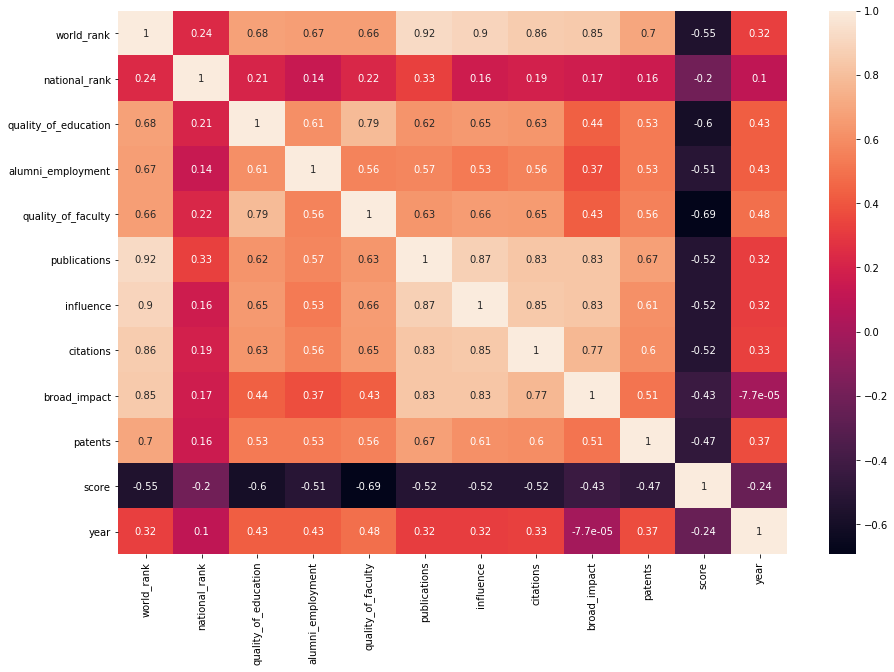

In [9]:
### Heatmap of the correlation 

plt.figure(figsize=(15, 10))

sn.heatmap(df.corr(), annot=True)
plt.show()

# B. Questions
### Answer the questions below based on the dataset. 

### 1. Focusing only on rows with world_rank smaller and inclusive of 100: Which country (throughout all years) has the most number universities within top 100 of world_rank? Let's call count of universities within top100 as 'count_100'. What are the top 10 countries by value of count_100, and what is count_100 for each of these countries?

In [10]:
### Count of Top 100 Countries

top_countries = df.world_rank.groupby(df.country).count().reset_index()
top_countries.columns = ["country", "count_100"]
top_countries

,country,count_100
0,Argentina,7
1,Australia,58
2,Austria,24
3,Belgium,20
4,Brazil,36
5,Bulgaria,2
6,Canada,72
7,Chile,8
8,China,167
9,Colombia,4


In [11]:
### Country with most number of Universities within top 100 of world_rank

top_country = top_countries.loc[top_countries.count_100.idxmax()]
print("\nCountry with most number of Universities within top 100 of world_rank :", top_country.country)


Country with most number of Universities within top 100 of world_rank : USA


In [12]:
### Top Ten Countries with high rank

print("\nTop Ten Countries with High Rank:\n")
top_ten_countries = top_countries.sort_values(by=['count_100'], ascending = False)[:10]
top_ten_countries


Top Ten Countries with High Rank:



,country,count_100
54,USA,573
8,China,167
28,Japan,159
57,United Kingdom,144
18,Germany,115
17,France,109
27,Italy,96
48,Spain,81
47,South Korea,72
6,Canada,72


### 2. For the top 10 countries with largest amount of top100 universities, What is the percentage composition of each countries' count_100 out of the 10 countries? (ie. the 10 countries make up 100%) 

In [13]:
### Percentage Composition of Top Ten Countries

percentage = top_ten_countries
percentage['%_composition'] = (percentage['count_100'] / percentage['count_100'].sum()) * 100

percentage

,country,count_100,%_composition
54,USA,573,36.083123
8,China,167,10.516373
28,Japan,159,10.012594
57,United Kingdom,144,9.068010
18,Germany,115,7.241814
17,France,109,6.863980
27,Italy,96,6.045340
48,Spain,81,5.100756
47,South Korea,72,4.534005
6,Canada,72,4.534005


### 3. Plot a graph showing the top 5 countries from Q2 and their counts

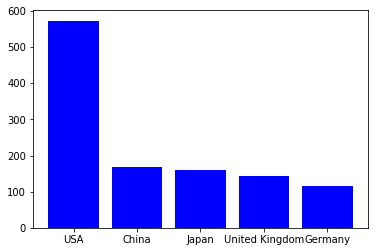

In [14]:
top_five_countries = top_countries.sort_values(by=['count_100'], ascending = False)[:5]
# plt.plot(top_five_countries.country, top_five_countries.count_100, color = 'r')
plt.bar(top_five_countries.country, top_five_countries.count_100, color = 'b')
plt.show()

### 4. Groupby year and country showing the count of universities with world_rank within top 100 for that country and year. Set the name for column of counts as 'count_top100'. Sort the year in ascending order while count_top100 in descending order. See the table below as example output.

In [15]:
df2 = df.world_rank.groupby([df.year,df.country]).count().reset_index()
df2 = df2.sort_values(by=['year', 'world_rank'], ascending = [True, False])

df2.columns = ['year', 'country', 'count_top100']
df2

,year,country,count_top100
14,2012,USA,58
15,2012,United Kingdom,8
4,2012,France,5
8,2012,Japan,5
6,2012,Israel,4
...,...,...,...
135,2015,Serbia,1
137,2015,Slovak Republic,1
148,2015,Uganda,1
149,2015,United Arab Emirates,1


### 5. Use an appropriate visual chart to display the trend for the count of top 100 universities for Japan, China and Singapore for years 2012 - 2015 in a single chart.

In [16]:
countries_to_include = ["Japan", "China", "Singapore"]

countries = df2[df2["country"].isin(countries_to_include)]
countries

,year,country,count_top100
8,2012,Japan,5
24,2013,Japan,6
28,2013,Singapore,1
42,2014,China,84
62,2014,Japan,74
77,2014,Singapore,2
101,2015,China,83
121,2015,Japan,74
136,2015,Singapore,2


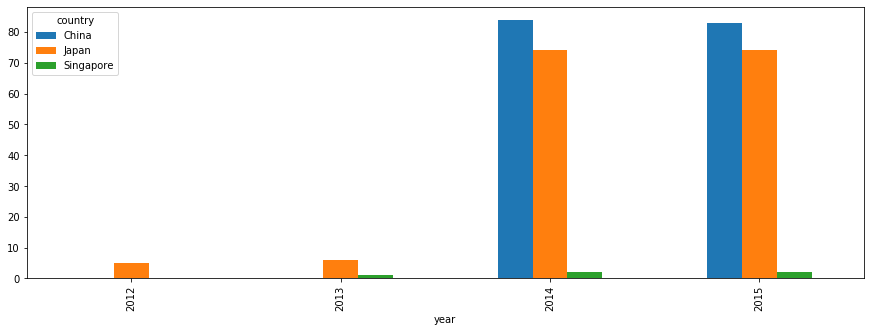

In [17]:
pd.pivot_table(countries, index = 'year', columns = 'country', values 
               = 'count_top100').plot(kind = 'bar',  figsize=(15,5))

### 6. For top 10 universities in 2015, what was the trend for world_rank for those universities across all the years? Which universities generally improved, and which ones declined in world_rank? Use an appropriate visual to show the trend and explain the results.

In [18]:
### Top 10 universities in 2015 
year_2015 = ['2015']
top_ten_of_2015 = df[df["year"].isin(year_2015)][:10]

top_ten_of_2015[['institution', 'world_rank', 'year']]

,institution,world_rank,year
1200,Harvard University,1,2015
1201,Stanford University,2,2015
1202,Massachusetts Institute of Technology,3,2015
1203,University of Cambridge,4,2015
1204,University of Oxford,5,2015
1205,Columbia University,6,2015
1206,"University of California, Berkeley",7,2015
1207,University of Chicago,8,2015
1208,Princeton University,9,2015
1209,Cornell University,10,2015


In [19]:
### Trend for all universities throughout all the years 

univerities_of_all_times = df
univerities_of_all_times = univerities_of_all_times[['institution', 'world_rank', 'year']]
univerities_of_all_times

,institution,world_rank,year
0,Harvard University,1,2012
1,Massachusetts Institute of Technology,2,2012
2,Stanford University,3,2012
3,University of Cambridge,4,2012
4,California Institute of Technology,5,2012
...,...,...,...
2195,University of the Algarve,996,2015
2196,Alexandria University,997,2015
2197,Federal University of Ceará,998,2015
2198,University of A Coruña,999,2015


In [20]:
### Trend for Top 10 universities throughout the years 

listof2015 = list(top_ten_of_2015['institution'])

trending_institutes = univerities_of_all_times[univerities_of_all_times["institution"].isin(listof2015)]
trending_institutes

,institution,world_rank,year
0,Harvard University,1,2012
1,Massachusetts Institute of Technology,2,2012
2,Stanford University,3,2012
3,University of Cambridge,4,2012
5,Princeton University,6,2012
6,University of Oxford,7,2012
8,Columbia University,9,2012
9,"University of California, Berkeley",10,2012
10,University of Chicago,11,2012
11,Cornell University,12,2012


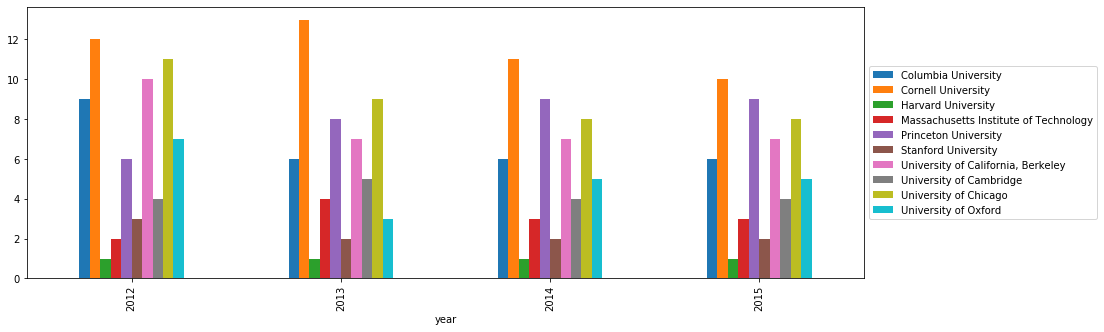

In [21]:
### Visual Result 
pd.pivot_table(trending_institutes, index = 'year', columns = 'institution', values 
               = 'world_rank').plot(kind = 'bar',  figsize=(15,5)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

# C. OPEN ENDED QUESTION (Choose 1 among the following)
### Option 1: What are some of the factors (variables) that may be related to the world_rank and/or score? Is there any trends indicating shift in importance of factors influencing world_rank over the years or between countries? 

### Option 2: What are the relationships between the factors (variables) themselves? Is there any interesting patterns that can be detected? You may also choose to discuss yearly or country trends or a mixture of both. 

### For either of the above, you may choose to pick around 3-4 factors to deep-dive (how many factors to analyse is up to you). Additionally, if there's any other interesting insights about the data, you may also include in your analysis. 

I have chosen Option 1 for this Open Ended Question 

I get the trends of each year by getting the correlation of that year
Correlation showed all the details, factors and how they impact on each other.

In [22]:
print("*** Impact of different factors on World_Rank ***")
score_impact = df['world_rank'].corr(df['score'])
print("Impact of 'Score' =", score_impact)

influence_impact = df['world_rank'].corr(df['influence'])
print("Impact of 'Influence'=", influence_impact)

citation_impact = df['world_rank'].corr(df['citations'])
print("Impact of 'Citations'=", citation_impact)

faculty_impact = df['influence'].corr(df['quality_of_faculty'])
print("Impact of 'Quality of Faculty' =", faculty_impact)

education_impact = df['world_rank'].corr(df['quality_of_education'])
print("Impact of 'Quality of Education'=", education_impact)

impacts = {"Score": score_impact, "Influence": influence_impact, "Citation":citation_impact,
           "Faculty": faculty_impact, "Education": education_impact}


major_impact = max(impacts.items(), key=operator.itemgetter(1))[0]

print("\n Major Impact on 'World_Rank' is of {0} = {1}".format(major_impact, impacts[major_impact]))

*** Impact of different factors on World_Rank ***
Impact of 'Score' = -0.5490983815855411
Impact of 'Influence'= 0.8958708318940485
Impact of 'Citations'= 0.8565731350030968
Impact of 'Quality of Faculty' = 0.6564058264715122
Impact of 'Quality of Education'= 0.676165823878376

 Major Impact on 'World_Rank' is of Influence = 0.8958708318940485


In [23]:
### Trend in Year 2012 

year_2012 = ['2012']
top_ten_of_2012 = df[df["year"].isin(year_2012)]
top_ten_of_2012.corr()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
world_rank,1.000000,2.438651e-01,5.639440e-01,4.182789e-01,7.695974e-01,6.276933e-01,7.052296e-01,6.757465e-01,0.000000e+00,0.576362,-8.629326e-01,NaN
national_rank,0.243865,1.000000e+00,2.788245e-01,8.740022e-02,4.275306e-01,1.453891e-01,1.131759e-01,-9.701854e-02,2.121562e-16,0.117727,-3.314568e-01,NaN
quality_of_education,0.563944,2.788245e-01,1.000000e+00,5.740088e-01,4.796724e-01,3.675353e-02,2.405849e-01,1.140917e-01,1.048527e-16,0.169283,-6.651410e-01,NaN
alumni_employment,0.418279,8.740022e-02,5.740088e-01,1.000000e+00,1.895904e-01,2.084746e-01,2.206719e-01,2.941293e-01,-3.783515e-16,0.293681,-5.891859e-01,NaN
quality_of_faculty,0.769597,4.275306e-01,4.796724e-01,1.895904e-01,1.000000e+00,3.443094e-01,4.596763e-01,3.428837e-01,-7.214112e-16,0.299862,-7.525607e-01,NaN
publications,0.627693,1.453891e-01,3.675353e-02,2.084746e-01,3.443094e-01,1.000000e+00,7.992473e-01,8.955452e-01,1.774067e-16,0.563160,-5.804209e-01,NaN
influence,0.705230,1.131759e-01,2.405849e-01,2.206719e-01,4.596763e-01,7.992473e-01,1.000000e+00,8.181009e-01,-8.038954e-16,0.396888,-6.641651e-01,NaN
citations,0.675746,-9.701854e-02,1.140917e-01,2.941293e-01,3.428837e-01,8.955452e-01,8.181009e-01,1.000000e+00,4.060389e-16,0.524805,-6.273957e-01,NaN
broad_impact,0.000000,2.121562e-16,1.048527e-16,-3.783515e-16,-7.214112e-16,1.774067e-16,-8.038954e-16,4.060389e-16,1.000000e+00,0.000000,1.199704e-16,NaN
patents,0.576362,1.177274e-01,1.692829e-01,2.936807e-01,2.998618e-01,5.631597e-01,3.968885e-01,5.248045e-01,0.000000e+00,1.000000,-5.318214e-01,NaN


In [24]:
### Trend in Year 2013 

year_2013 = ['2013']
top_ten_of_2013 = df[df["year"].isin(year_2013)]
top_ten_of_2013.corr()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
world_rank,1.000000,3.145773e-01,5.499988e-01,5.254404e-01,7.523961e-01,6.695196e-01,6.895265e-01,6.701019e-01,0.000000e+00,0.539342,-8.373329e-01,NaN
national_rank,0.314577,1.000000e+00,3.852864e-01,1.672988e-01,3.996037e-01,2.233459e-01,1.352487e-01,-1.073990e-02,-2.137102e-16,0.133092,-3.479078e-01,NaN
quality_of_education,0.549999,3.852864e-01,1.000000e+00,4.091154e-01,5.963137e-01,2.403586e-01,3.445423e-01,2.124245e-01,5.902594e-16,0.289557,-6.865283e-01,NaN
alumni_employment,0.525440,1.672988e-01,4.091154e-01,1.000000e+00,2.765445e-01,3.663783e-01,3.449805e-01,3.803755e-01,4.486943e-16,0.447658,-6.816142e-01,NaN
quality_of_faculty,0.752396,3.996037e-01,5.963137e-01,2.765445e-01,1.000000e+00,2.599678e-01,3.928407e-01,2.835631e-01,7.699342e-16,0.251080,-7.153796e-01,NaN
publications,0.669520,2.233459e-01,2.403586e-01,3.663783e-01,2.599678e-01,1.000000e+00,8.020144e-01,8.834417e-01,5.648175e-16,0.463815,-6.094913e-01,NaN
influence,0.689526,1.352487e-01,3.445423e-01,3.449805e-01,3.928407e-01,8.020144e-01,1.000000e+00,8.265637e-01,-6.452419e-16,0.298303,-6.553290e-01,NaN
citations,0.670102,-1.073990e-02,2.124245e-01,3.803755e-01,2.835631e-01,8.834417e-01,8.265637e-01,1.000000e+00,-4.739110e-16,0.437598,-6.360867e-01,NaN
broad_impact,0.000000,-2.137102e-16,5.902594e-16,4.486943e-16,7.699342e-16,5.648175e-16,-6.452419e-16,-4.739110e-16,1.000000e+00,0.000000,-1.056229e-18,NaN
patents,0.539342,1.330922e-01,2.895574e-01,4.476581e-01,2.510797e-01,4.638146e-01,2.983030e-01,4.375980e-01,0.000000e+00,1.000000,-5.546713e-01,NaN


In [25]:
### Trend in Year 2014

year_2014 = ['2014']
top_ten_of_2014 = df[df["year"].isin(year_2014)]
top_ten_of_2014.corr()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
world_rank,1.000000,0.195299,0.599191,0.602440,0.573340,0.905481,0.870616,0.826578,0.938793,0.629804,-0.565914,NaN
national_rank,0.195299,1.000000,0.156770,0.084726,0.175268,0.297834,0.106753,0.130071,0.164519,0.124291,-0.176572,NaN
quality_of_education,0.599191,0.156770,1.000000,0.470712,0.696766,0.524470,0.550751,0.532442,0.526383,0.396164,-0.612997,NaN
alumni_employment,0.602440,0.084726,0.470712,1.000000,0.388204,0.466252,0.411454,0.453773,0.430298,0.410360,-0.516014,NaN
quality_of_faculty,0.573340,0.175268,0.696766,0.388204,1.000000,0.534302,0.561509,0.550790,0.547639,0.414953,-0.729051,NaN
publications,0.905481,0.297834,0.524470,0.466252,0.534302,1.000000,0.850849,0.795559,0.917320,0.587176,-0.532438,NaN
influence,0.870616,0.106753,0.550751,0.411454,0.561509,0.850849,1.000000,0.813194,0.918193,0.508547,-0.530202,NaN
citations,0.826578,0.130071,0.532442,0.453773,0.550790,0.795559,0.813194,1.000000,0.854777,0.501941,-0.530054,NaN
broad_impact,0.938793,0.164519,0.526383,0.430298,0.547639,0.917320,0.918193,0.854777,1.000000,0.549453,-0.536053,NaN
patents,0.629804,0.124291,0.396164,0.410360,0.414953,0.587176,0.508547,0.501941,0.549453,1.000000,-0.467902,NaN


In [26]:
### Trend in Year 2015

year_2015 = ['2015']
top_ten_of_2015 = df[df["year"].isin(year_2015)]

top_ten_of_2015.corr()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
world_rank,1.000000,0.207617,0.577612,0.586218,0.572304,0.907588,0.876108,0.823055,0.947204,0.639701,-0.554571,NaN
national_rank,0.207617,1.000000,0.170368,0.078447,0.171665,0.303851,0.123909,0.158244,0.181568,0.104223,-0.176447,NaN
quality_of_education,0.577612,0.170368,1.000000,0.473653,0.685989,0.521378,0.549574,0.521067,0.517966,0.386652,-0.595771,NaN
alumni_employment,0.586218,0.078447,0.473653,1.000000,0.390605,0.476797,0.418218,0.449119,0.428065,0.398035,-0.480756,NaN
quality_of_faculty,0.572304,0.171665,0.685989,0.390605,1.000000,0.537166,0.570487,0.559989,0.553277,0.418088,-0.708048,NaN
publications,0.907588,0.303851,0.521378,0.476797,0.537166,1.000000,0.845110,0.788885,0.918436,0.616911,-0.521738,NaN
influence,0.876108,0.123909,0.549574,0.418218,0.570487,0.845110,1.000000,0.808917,0.913889,0.548654,-0.522732,NaN
citations,0.823055,0.158244,0.521067,0.449119,0.559989,0.788885,0.808917,1.000000,0.850637,0.518144,-0.517301,NaN
broad_impact,0.947204,0.181568,0.517966,0.428065,0.553277,0.918436,0.913889,0.850637,1.000000,0.580644,-0.527617,NaN
patents,0.639701,0.104223,0.386652,0.398035,0.418088,0.616911,0.548654,0.518144,0.580644,1.000000,-0.454706,NaN


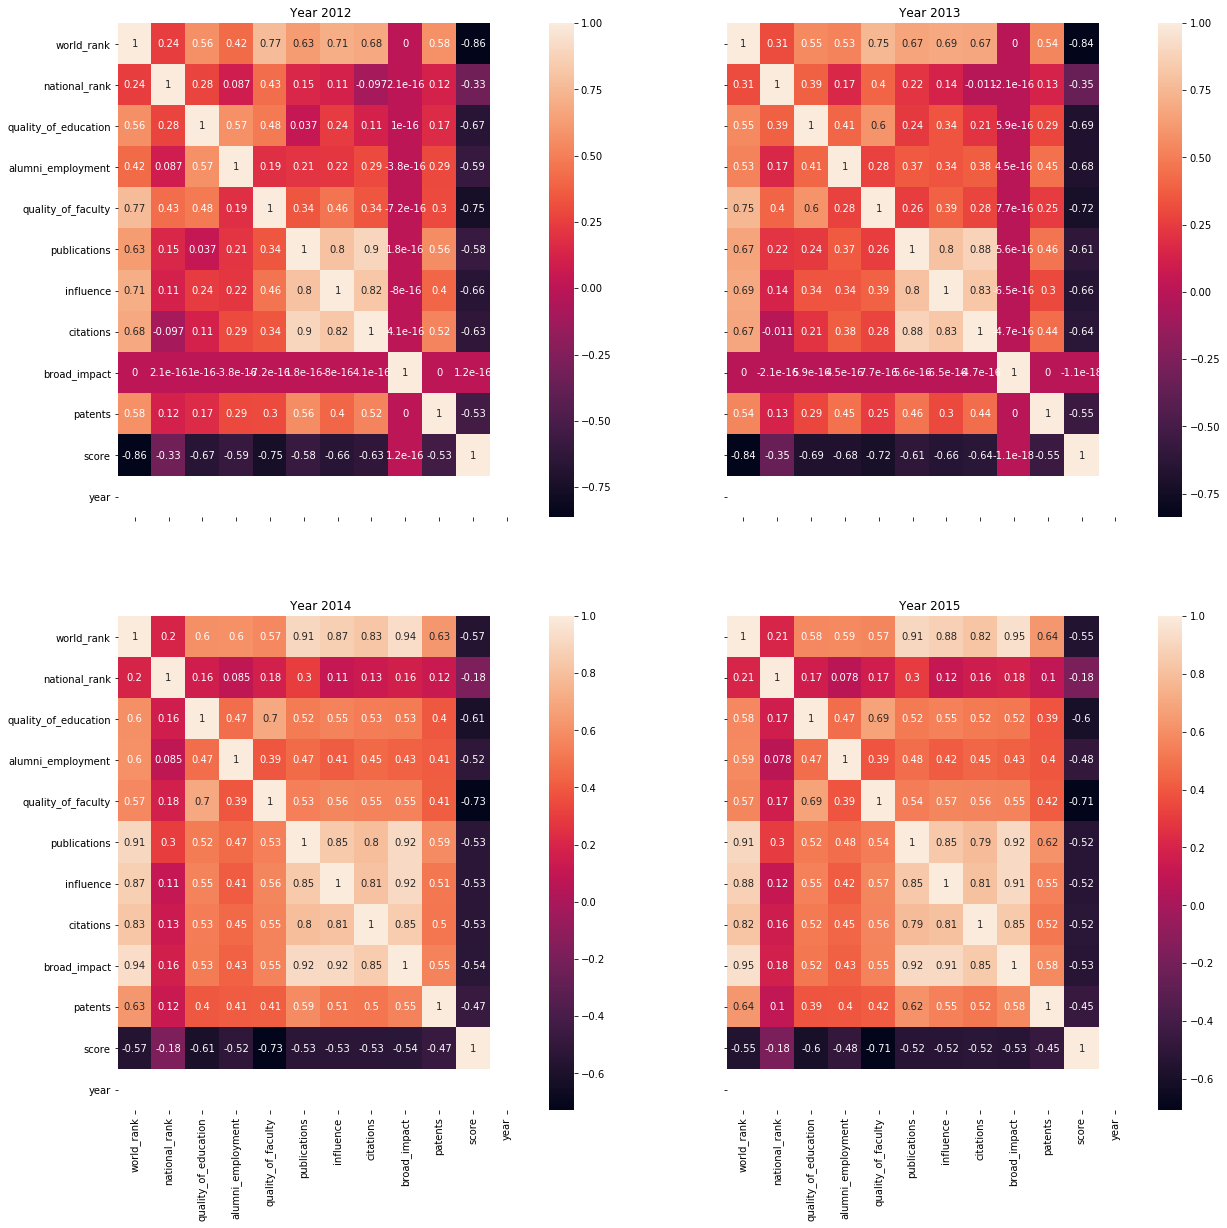

In [28]:
### Visual Result of the Trends

f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(20,20), sharey= True, sharex = True)

a = sn.heatmap(top_ten_of_2012.corr(), annot=True, ax=ax1)
a.set_title("Year 2012")
b = sn.heatmap(top_ten_of_2013.corr(), annot=True, ax=ax2)
b.set_title("Year 2013")
c = sn.heatmap(top_ten_of_2014.corr(), annot=True, ax=ax3)
c.set_title("Year 2014")
d = sn.heatmap(top_ten_of_2015.corr(), annot=True, ax=ax4)
d.set_title("Year 2015")
plt.show()